In [2]:
#Import basic libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read in the data into a pandas dataframe.
data = pd.read_csv('train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2.0,...,20,756,2549.0,9,7,19.0,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3.0,...,905,1988,2631.0,17,3,7.0,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5.0,...,1263,1716,2603.0,11,2,9.0,1,1,0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6.0,...,1216,1786,2769.0,16,8,11.0,1,0,0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2.0,...,1208,1212,1411.0,8,2,15.0,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6.0,...,1222,1890,668.0,13,4,19.0,1,1,0,0.0
1996,1965,1,2.6,1,0,0,39,0.2,187,4.0,...,915,1965,2032.0,11,10,16.0,1,1,1,2.0
1997,1911,0,0.9,1,1,1,36,0.7,108,8.0,...,868,1632,3057.0,9,1,5.0,1,1,0,3.0
1998,1512,0,0.9,0,4,1,46,0.1,145,5.0,...,336,670,869.0,18,10,19.0,1,1,1,0.0


In [4]:
#Explor Data 
#Check basic metadata.
print('Mobaile Shape')
print(data.shape)
print('Mobaile general information')
print(data.info())
print('Are there any variables with missing data in Data?')
print(data.isnull().any().any())
print('How balanced are the price_range, i.e. how common are 0 ..?')
print(data['price_range'].value_counts())
print('number of precentage for each class')
print(data['price_range'].value_counts(normalize=True))
print('price_range: This is the target variable with values of 0 (low cost), 1 (medium cost), 2 (high cost), and 3 (very high cost)..')

Mobaile Shape
(2000, 21)
Mobaile general information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          1999 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        1998 non-null   float64
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            1999 non-null   float64
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      1999 non-null   float64
 17 

In [5]:
print(data.isnull().sum())
print('number of missing value in m_dep,n_cores,ram,talk_time, price_range ')

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            1
mobile_wt        0
n_cores          2
pc               0
px_height        0
px_width         0
ram              1
sc_h             0
sc_w             0
talk_time        1
three_g          0
touch_screen     0
wifi             0
price_range      3
dtype: int64
number of missing value in m_dep,n_cores,ram,talk_time, price_range 


In [6]:
# preproccessing missing value with fillna

data['talk_time']=data['talk_time'].fillna(data['talk_time'].mean())
data['ram']=data['ram'].fillna(data['ram'].mean())
data['m_dep']=data['m_dep'].fillna(data['m_dep'].mean())
data['n_cores']=data['n_cores'].fillna(data['n_cores'].mean())
data['talk_time']=data['talk_time'].fillna(data['talk_time'].mean())
data['price_range']=data['price_range'].fillna(data['price_range'].mode()[0])

In [7]:
print(data.isnull().sum())
print('the prpblem in missing value is solve')

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
the prpblem in missing value is solve


Text(0.5, 1.0, 'number of precentage for each type in price_range')

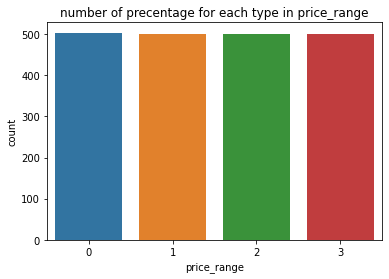

In [8]:
data['price_range'] = data['price_range'].values.astype(np.int64)
sns.countplot(x='price_range', data=data);
plt.title('number of precentage for each type in price_range')

Text(0.5, 1.0, 'Increasing the price level with the ram')

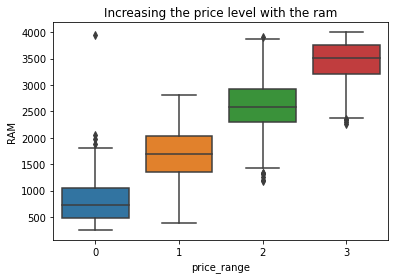

In [9]:
sns.boxplot(y='ram',x='price_range',data=data)
plt.xlabel('price_range')
plt.ylabel('RAM')
plt.title('Increasing the price level with the ram')

Text(0.5, 1.0, 'Increasing the price level with the ram')

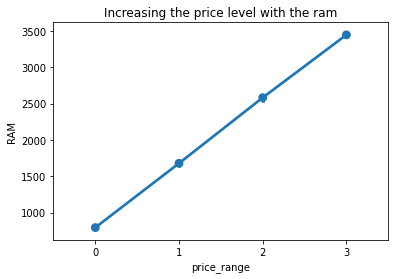

In [11]:
sns.pointplot(y='ram',x='price_range',data=data)
plt.xlabel('price_range')
plt.ylabel('RAM')
plt.title('Increasing the price level with the ram')

Text(0.5, 1.0, 'Increasing the price level with the battery_power')

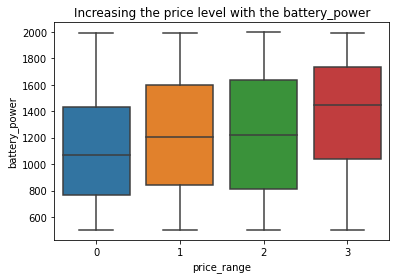

In [12]:
sns.boxplot(y='battery_power',x='price_range',data=data)
plt.xlabel('price_range')
plt.ylabel('battery_power')
plt.title('Increasing the price level with the battery_power')

Text(0.5, 1.0, 'Increasing the price level with the battery_power')

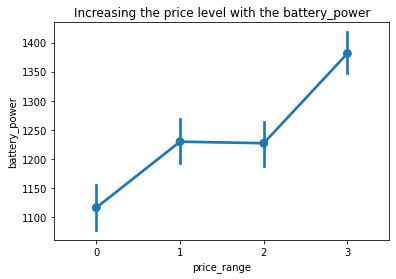

In [13]:
sns.pointplot(y='battery_power',x='price_range',data=data)
plt.xlabel('price_range')
plt.ylabel('battery_power')
plt.title('Increasing the price level with the battery_power')

<AxesSubplot:>

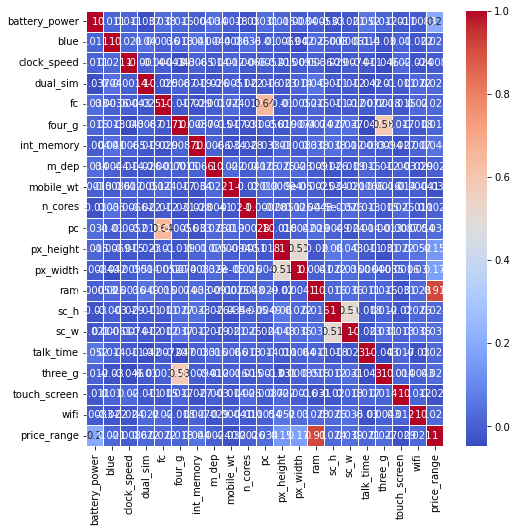

In [14]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linecolor='white', linewidths=1)

In [16]:
#Train/Test Split
# First split the data into features and response variable
X = data.drop(labels='price_range', axis=1)
y = data.loc[:,'price_range']             
#We'll use a test size of 30%.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print('The shape of training data')
print(X_train.shape)
print('The shape of testing data')
print(X_test.shape)

The shape of training data
(1400, 20)
The shape of testing data
(600, 20)


In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report #untuk confusion matrix
from sklearn.tree import DecisionTreeClassifier #untuk model decision tree
from sklearn import neighbors
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# training a model KNN
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_predicted = classifier.predict(X_test)
fold_acc = metrics.accuracy_score(y_test, y_predicted)
print(" acc is:", fold_acc)

 acc is: 0.9133333333333333


In [19]:
print('========================== Model Test Results ========================' "\n")
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics  

accuracy = metrics.accuracy_score(y_test, classifier.predict(X_test))
confusion_matrix = metrics.confusion_matrix(y_test, classifier.predict(X_test))
classification = metrics.classification_report(y_test, classifier.predict(X_test))

print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
print()
print("Confusion Matrix:" "\n", confusion_matrix)
print()
print("Classification Report:" "\n", classification)
print()

========================== Model Test Results ========================

Model Accuracy:  91.3%

Confusion Matrix:
 [[145   5   0   1]
 [  9 135   5   0]
 [  0  14 129   7]
 [  0   0  11 139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       151
           1       0.88      0.91      0.89       149
           2       0.89      0.86      0.87       150
           3       0.95      0.93      0.94       150

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600




In [20]:
# training a model DT
ros_model =DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5).fit(X_train, y_train)
y_ros = ros_model.predict(X_test)
fold_acc_KNN = metrics.accuracy_score(y_test, y_ros)
print(" acc is:", fold_acc_KNN)

 acc is: 0.7283333333333334


In [21]:
print('========================== Model Test Results ========================' "\n")
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics


accuracy = metrics.accuracy_score(y_test, ros_model.predict(X_test))
confusion_matrix = metrics.confusion_matrix(y_test, ros_model.predict(X_test))
classification = metrics.classification_report(y_test, ros_model.predict(X_test))

print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
print()
print("Confusion Matrix:" "\n", confusion_matrix)
print()
print("Classification Report:" "\n", classification)
print()

========================== Model Test Results ========================

Model Accuracy:  72.8%

Confusion Matrix:
 [[108  42   0   1]
 [  7 128  14   0]
 [  0  42  85  23]
 [  0   1  33 116]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.72      0.81       151
           1       0.60      0.86      0.71       149
           2       0.64      0.57      0.60       150
           3       0.83      0.77      0.80       150

    accuracy                           0.73       600
   macro avg       0.75      0.73      0.73       600
weighted avg       0.75      0.73      0.73       600


